# Support Vector Classifier (SVC)

Implementación del algoritmo de Support Vector Machines (SVM) para tareas de clasificación.

Su objetivo es encontrar el hiperplano que mejor separa las clases en el espacio de características, maximizando el margen entre las observaciones más cercanas de cada clase, conocidas como vectores de soporte.

Este enfoque permite una gran capacidad de generalización, incluso en espacios de alta dimensión.

Además, mediante el uso de funciones kernel, SVC puede manejar relaciones no lineales transformando los datos a espacios de mayor dimensión donde la separación sea posible. Es especialmente útil en problemas complejos con fronteras de decisión no triviales.

Carguemos las librerías necesarias para la implementación del modelo.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Usaremos un dataset que viene incluido en sklearn.

In [2]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

Visualicemos el dataset.

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Veamos la información del dataset.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Dividamos el dataset entre datos de entrenamiento y validación.

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

Creemos el pipeline del modelo.

In [ ]:
pipe_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('svm', SVC(random_state=42,
                C=0.1,
                kernel='rbf',
                gamma='scale'
                ))
])

Entrenemos el modelo, realicemos la predicción y evaluemosla con las métricas respectivas.

In [ ]:
pipe_svm.fit(X_tr, y_tr)
y_pred_svm = pipe_svm.predict(X_te)
print(confusion_matrix(y_te, y_pred_svm))
print(classification_report(y_te, y_pred_svm))

[[39  4]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Aquí disminuimos a 0 los casos falsos negativos pero aumentamos los casos falsos positivos.

Visualizacion con reduccion de variables a través de un gráfico.

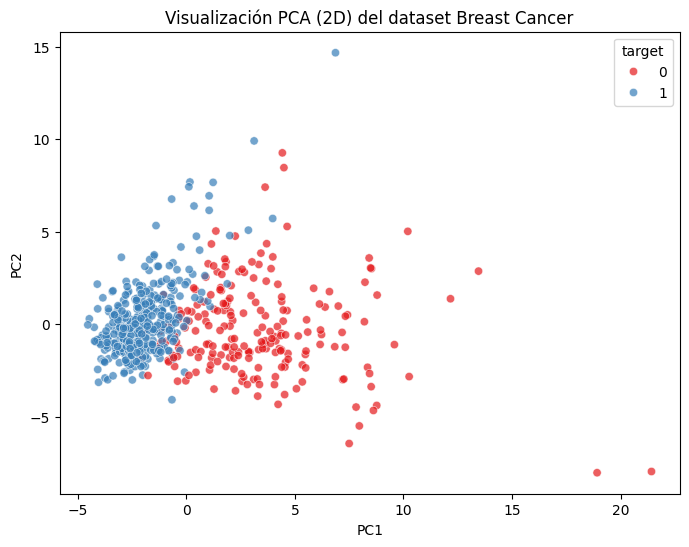

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)
X_2D_df = pd.DataFrame(X_2D, columns=['PC1', 'PC2'])
X_2D_df['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=X_2D_df, x='PC1', y='PC2', hue='target', palette='Set1', alpha=0.7)
plt.title('Visualización PCA (2D) del dataset Breast Cancer')
plt.show()

Notemos que viendo la figura es muy complicado ajustar la curva del svm ya que hay muchos casos que se sobreponen.